In [17]:
import os
import glob
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras import backend as K
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.applications import efficientnet
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
tf.compat.v1.disable_eager_execution()

import matplotlib.pyplot as plt
import cv2

In [6]:
img_size = 256

In [10]:
K.clear_session()

base_model = efficientnet.EfficientNetB0(
    weights='imagenet',
    include_top=False,
    input_shape=(img_size, img_size, 3)
)


hl = GlobalAveragePooling2D()(base_model.output)
ol = Dense(1, activation='sigmoid')(hl)

model = Model(base_model.input, ol)

model.trainable = False

In [12]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 256, 256, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 256, 256, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 rescaling_1 (Rescaling)        (None, 256, 256, 3)  0           ['normalization[0][0]']      

In [15]:
model.load_weights('/content/drive/MyDrive/에이블스쿨/실습파일/2023.03.20 미니프로젝트 3차 (1)/checkpoints/EfficientNetB0_GAP2/save_model.h5')

In [16]:
path = '/content/drive/MyDrive/에이블스쿨/실습파일/2023.03.20 미니프로젝트 3차 (1)/Datasets/Car_Images_test/abnormal/'
file_list = glob.glob(path + '*.*')

/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


[[0.92916924]] [[1.]]


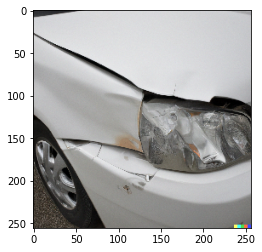

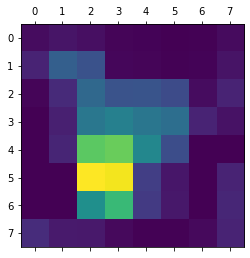

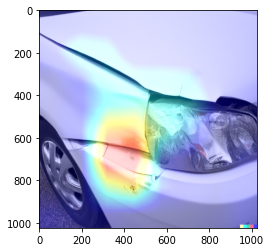

In [18]:
layer_name = 'top_activation'
num = 1280

img_size = 256
idx = 1

img = load_img(file_list[idx], target_size=(img_size, img_size, 3))
img = img_to_array(img) / 255
img_tensor = np.expand_dims(img, axis=0)
plt.imshow(img)

pred = model.predict(img_tensor)
print(pred, np.round(pred))

pred_output = model.output[:, 0]
last_conv_layer = model.get_layer(layer_name)
grads = K.gradients(pred_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([img_tensor])

for i in range(num):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()


img = cv2.imread(file_list[idx])
temp = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
temp = np.uint8(255 * temp)
temp = cv2.applyColorMap(temp, cv2.COLORMAP_JET)
superimposed_img = np.clip((temp * 0.4 + img), 0, 255).astype(np.uint8)
plt.imshow(superimposed_img[:, :, ::-1])

[[0.9968058]] [[1.]]


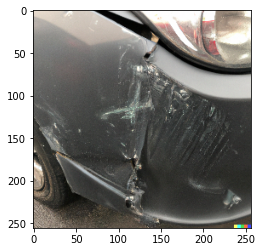

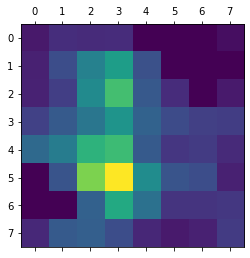

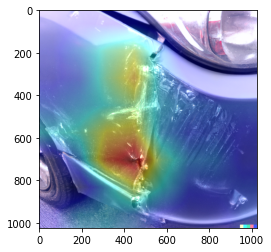

In [19]:
layer_name = 'top_activation'
num = 1280

img_size = 256
idx = 2

img = load_img(file_list[idx], target_size=(img_size, img_size, 3))
img = img_to_array(img) / 255
img_tensor = np.expand_dims(img, axis=0)
plt.imshow(img)

pred = model.predict(img_tensor)
print(pred, np.round(pred))

pred_output = model.output[:, 0]
last_conv_layer = model.get_layer(layer_name)
grads = K.gradients(pred_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([img_tensor])

for i in range(num):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()


img = cv2.imread(file_list[idx])
temp = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
temp = np.uint8(255 * temp)
temp = cv2.applyColorMap(temp, cv2.COLORMAP_JET)
superimposed_img = np.clip((temp * 0.4 + img), 0, 255).astype(np.uint8)
plt.imshow(superimposed_img[:, :, ::-1])

[[0.522991]] [[1.]]


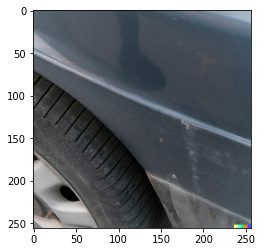

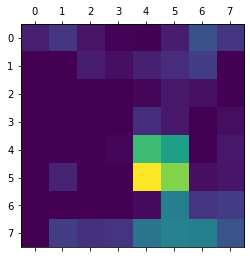

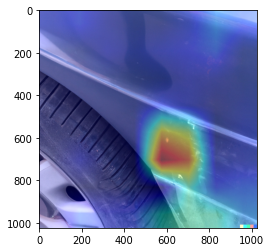

In [20]:
layer_name = 'top_activation'
num = 1280

img_size = 256
idx = 3

img = load_img(file_list[idx], target_size=(img_size, img_size, 3))
img = img_to_array(img) / 255
img_tensor = np.expand_dims(img, axis=0)
plt.imshow(img)

pred = model.predict(img_tensor)
print(pred, np.round(pred))

pred_output = model.output[:, 0]
last_conv_layer = model.get_layer(layer_name)
grads = K.gradients(pred_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([img_tensor])

for i in range(num):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()


img = cv2.imread(file_list[idx])
temp = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
temp = np.uint8(255 * temp)
temp = cv2.applyColorMap(temp, cv2.COLORMAP_JET)
superimposed_img = np.clip((temp * 0.4 + img), 0, 255).astype(np.uint8)
plt.imshow(superimposed_img[:, :, ::-1])

[[0.9480766]] [[1.]]


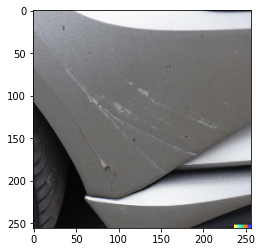

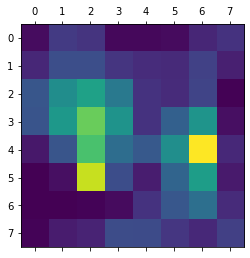

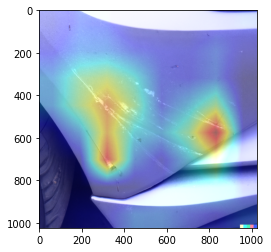

In [21]:
layer_name = 'top_activation'
num = 1280

img_size = 256
idx = 4

img = load_img(file_list[idx], target_size=(img_size, img_size, 3))
img = img_to_array(img) / 255
img_tensor = np.expand_dims(img, axis=0)
plt.imshow(img)

pred = model.predict(img_tensor)
print(pred, np.round(pred))

pred_output = model.output[:, 0]
last_conv_layer = model.get_layer(layer_name)
grads = K.gradients(pred_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([img_tensor])

for i in range(num):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()


img = cv2.imread(file_list[idx])
temp = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
temp = np.uint8(255 * temp)
temp = cv2.applyColorMap(temp, cv2.COLORMAP_JET)
superimposed_img = np.clip((temp * 0.4 + img), 0, 255).astype(np.uint8)
plt.imshow(superimposed_img[:, :, ::-1])

[[0.99653643]] [[1.]]


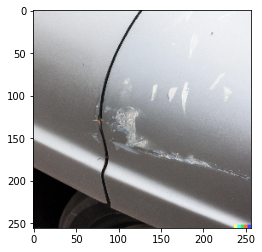

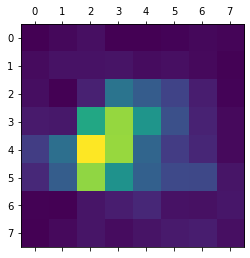

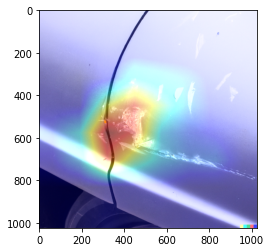

In [22]:
layer_name = 'top_activation'
num = 1280

img_size = 256
idx = 0

img = load_img(file_list[idx], target_size=(img_size, img_size, 3))
img = img_to_array(img) / 255
img_tensor = np.expand_dims(img, axis=0)
plt.imshow(img)

pred = model.predict(img_tensor)
print(pred, np.round(pred))

pred_output = model.output[:, 0]
last_conv_layer = model.get_layer(layer_name)
grads = K.gradients(pred_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([img_tensor])

for i in range(num):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()


img = cv2.imread(file_list[idx])
temp = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
temp = np.uint8(255 * temp)
temp = cv2.applyColorMap(temp, cv2.COLORMAP_JET)
superimposed_img = np.clip((temp * 0.4 + img), 0, 255).astype(np.uint8)
plt.imshow(superimposed_img[:, :, ::-1])